# Prepare maket research

Running a cafe in Los Angeles, you want to find out the current market conditions to maintain success for the cafe. 

# Step 1

Download the data and prepare it for analysis

In [1]:
#import pandas and other important libraries
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns
import scipy.stats as stats
import plotly.express as px
from plotly import graph_objects as go
import re

warnings.filterwarnings('ignore')

In [2]:
#read all input data and assign each dataset to a variable
try:
    rest_data = pd.read_csv('rest_data_us.csv')
except:
    rest_data = pd.read_csv('/datasets/rest_data_us.csv')

In [3]:
#looking at initial data
rest_data.info()
print('\nNumber of duplicates found: ', rest_data.duplicated().sum())
print('\nNumber of missing values found: ')
print(rest_data.isna().sum())
rest_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
id             9651 non-null int64
object_name    9651 non-null object
address        9651 non-null object
chain          9648 non-null object
object_type    9651 non-null object
number         9651 non-null int64
dtypes: int64(2), object(4)
memory usage: 452.5+ KB

Number of duplicates found:  0

Number of missing values found: 
id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64


,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6


In [4]:
#changing column names, making everything upper case, and getting rid of missing data
rest_data = rest_data.dropna().reset_index(drop=True)
rest_data.info()
rest_data.columns = ['id', 'store_name', 'address', 'chain', 'location_type', 'number_of_seats']
rest_data['store_name'] = rest_data['store_name'].str.upper()
rest_data['address'] = rest_data['address'].str.upper()
print('\nNumber of duplicates found: ', rest_data.duplicated().sum())
print('\nNumber of missing values found: ')
print(rest_data.isna().sum())
rest_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 6 columns):
id             9648 non-null int64
object_name    9648 non-null object
address        9648 non-null object
chain          9648 non-null object
object_type    9648 non-null object
number         9648 non-null int64
dtypes: int64(2), object(4)
memory usage: 452.4+ KB

Number of duplicates found:  0

Number of missing values found: 
id                 0
store_name         0
address            0
chain              0
location_type      0
number_of_seats    0
dtype: int64


,id,store_name,address,chain,location_type,number_of_seats
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
...,...,...,...,...,...,...
9643,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122
9644,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93
9645,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15
9646,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6


# Conclusion

There was a 3 missing values under the chain column, so I removed the rows due to the low number of missing. Each column is already in the correct data type, everything looks normal upon first glance.

# Step 2 

Data analysis

 - Investigate the proportions of the various types of establishments. Plot a graph.
 - Investigate the proportions of chain and nonchain establishments. Plot a graph.
 - Which type of establishment is typically a chain?
 - What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?
 - Determine the average number of seats for each type of restaurant. On average, which type of restaurant has the greatest number of seats? Plot graphs.
 - Put the data on street names from the address column in a separate column.
 - Plot a graph of the top ten streets by number of restaurants.
 - Find the number of streets that only have one restaurant.
 - For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can you see?

Draw an overall conclusion and provide recommendations on restaurant type and number of seats. Comment on the possibility of developing a chain.

## Investigate the proportions of the various types of establishments

Plot a graph

In [5]:
#finding number of locations by location type
type_count = rest_data.groupby('location_type').agg({'id': 'count'}).reset_index()
type_count.columns = ['location_type', 'location_count']
type_count.sort_values('location_count', ascending = False)

,location_type,location_count
5,Restaurant,7253
3,Fast Food,1066
2,Cafe,435
4,Pizza,319
1,Bar,292
0,Bakery,283


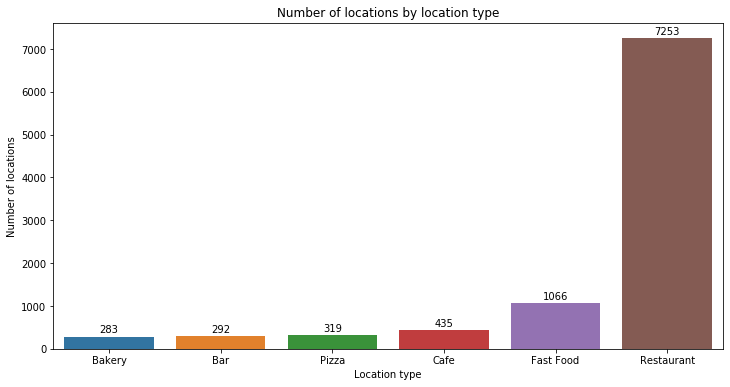

In [6]:
#plotting the graph
plt.figure(figsize= (12, 6))
type_graph = sns.barplot(x='location_type', y='location_count', data=type_count, order = type_count.sort_values('location_count').location_type)

#extra graph details
plt.title('Number of locations by location type')
plt.xlabel('Location type')
plt.ylabel('Number of locations')

#putting numbers on top of each bar, for easy reading
for bar in type_graph.patches:
    type_graph.annotate(format(bar.get_height(), '.0f'),
                       xy = (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                       ha = 'center',
                       va = 'center',
                       xytext = (0, 7),
                       textcoords = 'offset points')
plt.show()

### Conclusion

As seen on the graph, the biggest number of locations is the restaurant type. The difference between restaurant and fast food is huge as well, with a difference of over 6000 location differences.

## Investigate the proportions of chain and nonchain establishments 

Plot a graph

In [7]:
#finding number of locations by what type of chain
chain_count = rest_data.groupby('chain').agg({'id': 'count'}).reset_index()
chain_count.columns = ['chain', 'location_count']
chain_count.sort_values('location_count', ascending = False)

,chain,location_count
0,False,5972
1,True,3676


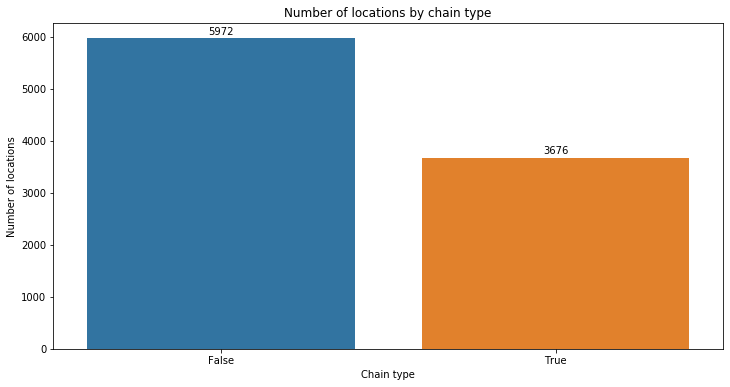

In [8]:
#plotting the graph
plt.figure(figsize= (12, 6))
chain_graph = sns.barplot(x='chain', y='location_count', data=chain_count)

#extra graph details
plt.title('Number of locations by chain type')
plt.xlabel('Chain type')
plt.ylabel('Number of locations')

#putting numbers on top of each bar, for easy reading
for bar in chain_graph.patches:
    chain_graph.annotate(format(bar.get_height(), '.0f'),
                       xy = (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                       ha = 'center',
                       va = 'center',
                       xytext = (0, 7),
                       textcoords = 'offset points')
plt.show()

### Conclusion

As seen on the graph, most (62%) of the locations are not in a chain, with a 2296 location difference between False and True chain types.

## Which type of establishment is typically a chain?

In [9]:
#making a pivot table to find what location type is in a chain
location_chain = rest_data.pivot_table(index='location_type', columns='chain', values='id', aggfunc='count').reset_index()
location_chain.columns = ['location_type', 'not_in_chain', 'in_chain']

#filling in na, due to total not registering nan as 0, and also converting to int for the table to look nicer.
location_chain['not_in_chain'] = location_chain['not_in_chain'].fillna(value=0)
location_chain['not_in_chain'] = location_chain['not_in_chain'].astype('int')
location_chain['in_chain'] = location_chain['in_chain'].astype('int')

#making a total and a percentage of in chain compared to total.
location_chain['total'] = location_chain['not_in_chain'] + location_chain['in_chain']
location_chain['percentage_in_chain'] = ((location_chain['in_chain'] / location_chain['total']) * 100).round()
location_chain.sort_values('percentage_in_chain', ascending = False)

,location_type,not_in_chain,in_chain,total,percentage_in_chain
0,Bakery,0,283,283,100.0
2,Cafe,169,266,435,61.0
3,Fast Food,461,605,1066,57.0
4,Pizza,166,153,319,48.0
5,Restaurant,4961,2292,7253,32.0
1,Bar,215,77,292,26.0


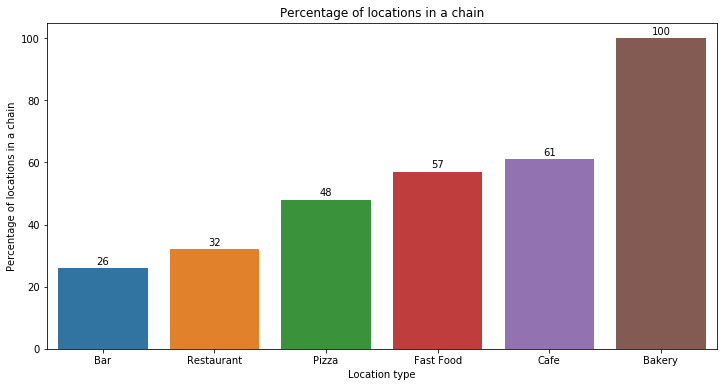

In [10]:
#plotting the graph
plt.figure(figsize= (12, 6))
percent_chain = sns.barplot(x='location_type', y='percentage_in_chain', data=location_chain, order = location_chain.sort_values('percentage_in_chain').location_type)

#extra graph details
plt.title('Percentage of locations in a chain')
plt.xlabel('Location type')
plt.ylabel('Percentage of locations in a chain')

#putting numbers on top of each bar, for easy reading
for bar in percent_chain.patches:
    percent_chain.annotate(format(bar.get_height(), '.0f'),
                       xy = (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                       ha = 'center',
                       va = 'center',
                       xytext = (0, 7),
                       textcoords = 'offset points')
plt.show()

### Conclusion

With the data provided, 100% of bakers are in a chain, with Cafes and Fast Food also being mostly in chain as well.

## What characterizes chains: Many establishments with a small number of seats or a few establishments with a lot of seats?

Text(0, 0.5, 'Number of seats')

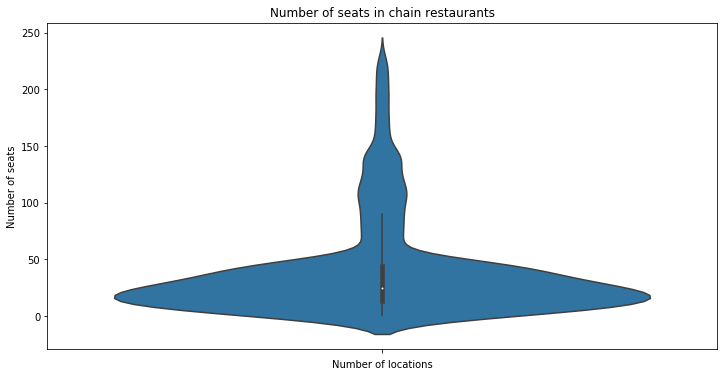

In [11]:
#Making a query just for those locations where chain is true
chain_seats = rest_data.query('chain == True')

#making a violin plot to see amount of locations with x amount of chairs
plt.figure(figsize= (12, 6))
sns.violinplot(y='number_of_seats', data=chain_seats) 

#extra graph details
plt.title('Number of seats in chain restaurants')
plt.xlabel('Number of locations')
plt.ylabel('Number of seats')

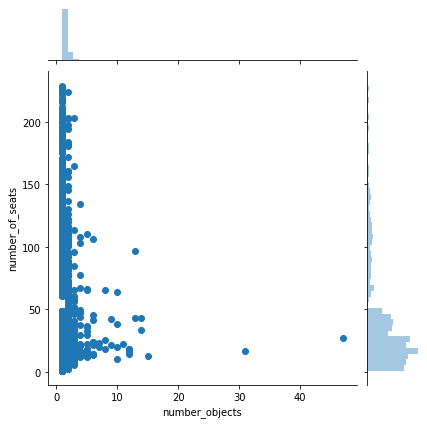

In [35]:
data_agg = rest_data.groupby(['store_name', 'chain']).agg({'number_of_seats': 'mean', 'address': 'count'}).reset_index()
data_agg.columns = ['store_name', 'chain', 'number_of_seats', 'number_objects']

chains_data = data_agg[data_agg['chain'] == True]
chains_data.head()

sns.jointplot(x="number_objects", y="number_of_seats", data=chains_data)
plt.show()

### Conclusion

According to the graphs, what characterizes chains are many establishments with small number of seats. As seen on the graph, most locations sit around 20 seats, and it's more typical to have lower amount of seats. 

## Determine the average number of seats for each type of restaurant. On average, which type of restaurant has the greatest number of seats? 

Plot a graph

In [12]:
#doing a groupby to find avg amount of seats per location type
avg_seats = rest_data.groupby('location_type').agg({'number_of_seats': 'mean'}).reset_index()
avg_seats.columns = ['location_type', 'avg_num_seats']
avg_seats['avg_num_seats'] = avg_seats['avg_num_seats'].astype('int')
avg_seats

,location_type,avg_num_seats
0,Bakery,21
1,Bar,44
2,Cafe,25
3,Fast Food,31
4,Pizza,28
5,Restaurant,48


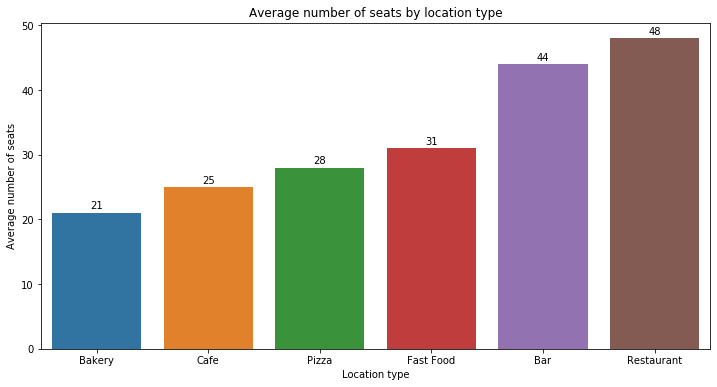

In [13]:
#plotting the graph
plt.figure(figsize= (12, 6))
avg_seats_graph = sns.barplot(x='location_type', y='avg_num_seats', data=avg_seats, order = avg_seats.sort_values('avg_num_seats').location_type)

#extra graph details
plt.title('Average number of seats by location type')
plt.xlabel('Location type')
plt.ylabel('Average number of seats')

#putting numbers on top of each bar, for easy reading
for bar in avg_seats_graph.patches:
    avg_seats_graph.annotate(format(bar.get_height(), '.0f'),
                       xy = (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                       ha = 'center',
                       va = 'center',
                       xytext = (0, 7),
                       textcoords = 'offset points')
plt.show()

### Conclusion

On average, the Restaurant location type has the most average number of seats, sitting at 48 seats. The Bar location type takes second place with 44 on average, with a bigger gap at Fast Food with 31 sitting in third.

## Put the data on street names from the address column in a separate column.

In [14]:
rest_data['street_name']=rest_data['address'].apply(lambda x: re.search('[A-z]+[' ']*\d?*[A-z ]+', x).group())
rest_data.head(20)

,id,store_name,address,chain,location_type,number_of_seats,street_name
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,N EAGLE ROCK BLVD
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,WORLD WAY
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,HOLLYWOOD BLVD
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,ECHO PARK AVE
5,11791,THE SPOT GRILL,10004 NATIONAL BLVD,False,Restaurant,14,NATIONAL BLVD
6,11792,CPK,100 WORLD WAY # 126,False,Restaurant,100,WORLD WAY
7,11793,PHO LALA,3500 W 6TH ST STE 226,False,Restaurant,7,W 6TH ST STE 226
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1,N SAN FERNANDO RD UNIT 103
9,11795,UPSTAIRS,3707 N CAHUENGA BLVD,False,Restaurant,35,N CAHUENGA BLVD


## Plot a graph of the top ten streets by number of restaurants.

In [15]:
#making a groupby so I can find top streets by number of restaurants
top_streets = rest_data.groupby('street_name').agg({'id': 'count'}).reset_index()
top_streets.columns = ['street_name', 'restaurant_count']
top_streets = top_streets.sort_values('restaurant_count', ascending = False).head(10)
top_streets

,street_name,restaurant_count
1736,W SUNSET BLVD,305
1707,W PICO BLVD,291
405,HOLLYWOOD BLVD,168
1823,WILSHIRE BLVD,164
1193,S VERMONT AVE,151
1452,W 3RD ST,151
1295,SANTA MONICA BLVD,146
49,BEVERLY BLVD,138
942,S FIGUEROA ST,135
531,MELROSE AVE,134


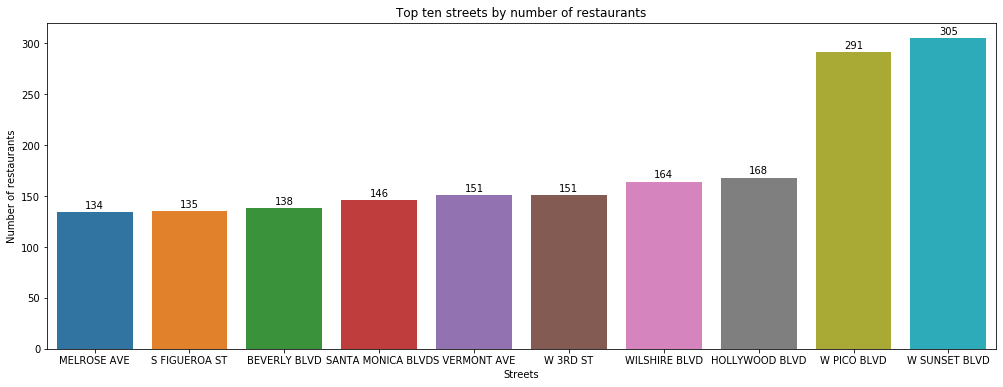

In [16]:
#plotting the graph
plt.figure(figsize= (17, 6))
streets_graph = sns.barplot(x='street_name', y='restaurant_count', data=top_streets, order = top_streets.sort_values('restaurant_count').street_name)

#extra graph details
plt.title('Top ten streets by number of restaurants')
plt.xlabel('Streets')
plt.ylabel('Number of restaurants')

#putting numbers on top of each bar, for easy reading
for bar in streets_graph.patches:
    streets_graph.annotate(format(bar.get_height(), '.0f'),
                       xy = (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                       ha = 'center',
                       va = 'center',
                       xytext = (0, 7),
                       textcoords = 'offset points')
plt.show()

### Conclusion

As seen on the graph, the top street by number of restaurants is W Sunset BLVD with 304 restaurants in the area. Second place is W Pico BLVD with 290, while the next few places go way down with Hollywood BLVD at 167, going down by a few restaurants for the rest. 

## Find the number of streets that only have one restaurant

In [17]:
#making a groupby to find how many streets have only one restaurant
one_restaurant = rest_data.groupby('street_name').agg({'id': 'count'}).reset_index()
one_restaurant.columns = ['street_name', 'restaurant_count']
one_restaurant = one_restaurant.query('restaurant_count == 1')
print('The number of streets that only have one restaurant is:', one_restaurant['restaurant_count'].sum())

The number of streets that only have one restaurant is: 1301


## For streets with a lot of restaurants, look at the distribution of the number of seats. 

What trends can you see?

In [18]:
#making a groupby so I can find top streets by number of restaurants, while also adding all chairs together
top_distribution = rest_data.groupby('street_name').agg({"id":'count',"number_of_seats":"sum"}).reset_index()
top_distribution.columns = ['street_name', 'restaurant_count', 'sum_seats']
top_distribution = top_distribution.sort_values('restaurant_count', ascending = False).head(10)
top_distribution

,street_name,restaurant_count,sum_seats
1736,W SUNSET BLVD,305,15456
1707,W PICO BLVD,291,11868
405,HOLLYWOOD BLVD,168,8978
1823,WILSHIRE BLVD,164,10072
1193,S VERMONT AVE,151,6834
1452,W 3RD ST,151,6562
1295,SANTA MONICA BLVD,146,4729
49,BEVERLY BLVD,138,6130
942,S FIGUEROA ST,135,6831
531,MELROSE AVE,134,6808


Text(0, 0.5, 'Total number of seats')

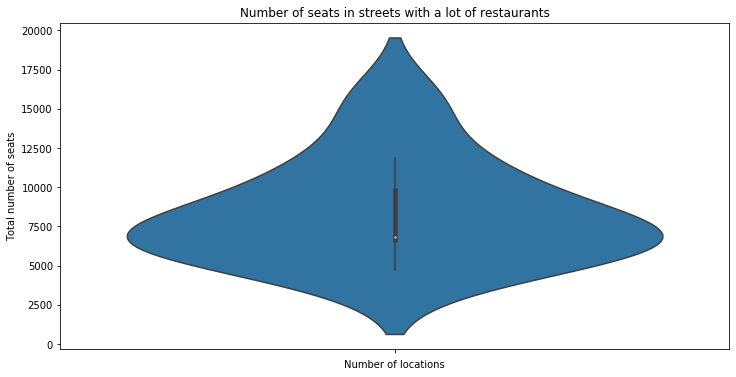

In [19]:
#making a violin plot to see amount of locations with x amount of chairs
plt.figure(figsize= (12, 6))
sns.violinplot(y='sum_seats', data=top_distribution) 

#extra graph details
plt.title('Number of seats in streets with a lot of restaurants')
plt.xlabel('Number of locations')
plt.ylabel('Total number of seats')

### Conclusion

It seems that the majority of locations have a sum of 6000 seats. There are some notable outliers for example W SUNSET BLVD having 15456 seats with an impressive 305 restaurants in the area, but for the most part, the top locations would have around 140 restaurants with around 6000 seats total.

## Draw an overall conclusion and provide recommendations on restaurant type and number of seats. Comment on the possibility of developing a chain.

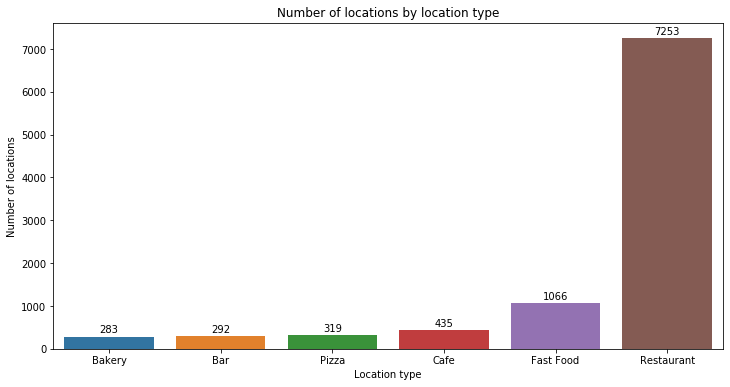

In [20]:
#plotting the graph
plt.figure(figsize= (12, 6))
type_graph = sns.barplot(x='location_type', y='location_count', data=type_count, order = type_count.sort_values('location_count').location_type)

#extra graph details
plt.title('Number of locations by location type')
plt.xlabel('Location type')
plt.ylabel('Number of locations')

#putting numbers on top of each bar, for easy reading
for bar in type_graph.patches:
    type_graph.annotate(format(bar.get_height(), '.0f'),
                       xy = (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                       ha = 'center',
                       va = 'center',
                       xytext = (0, 7),
                       textcoords = 'offset points')
plt.show()

### What location type should we choose?
As seen with this graph, we can see that typical restaurants are the most popular, having the most number of locations. Perhaps it's worth considering. 

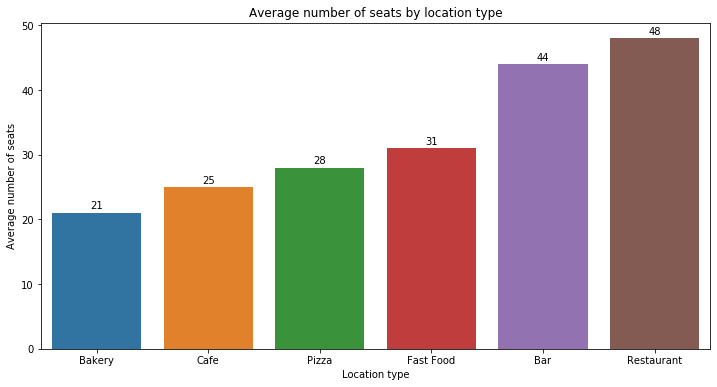

In [21]:
#plotting the graph
plt.figure(figsize= (12, 6))
avg_seats_graph = sns.barplot(x='location_type', y='avg_num_seats', data=avg_seats, order = avg_seats.sort_values('avg_num_seats').location_type)

#extra graph details
plt.title('Average number of seats by location type')
plt.xlabel('Location type')
plt.ylabel('Average number of seats')

#putting numbers on top of each bar, for easy reading
for bar in avg_seats_graph.patches:
    avg_seats_graph.annotate(format(bar.get_height(), '.0f'),
                       xy = (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                       ha = 'center',
                       va = 'center',
                       xytext = (0, 7),
                       textcoords = 'offset points')
plt.show()

### How many seats should we have?

If we are considering our location type to be a restaurant, then we should have around 48 seats. As seen on the graph, the average number of chairs for a restaurant is 48. 

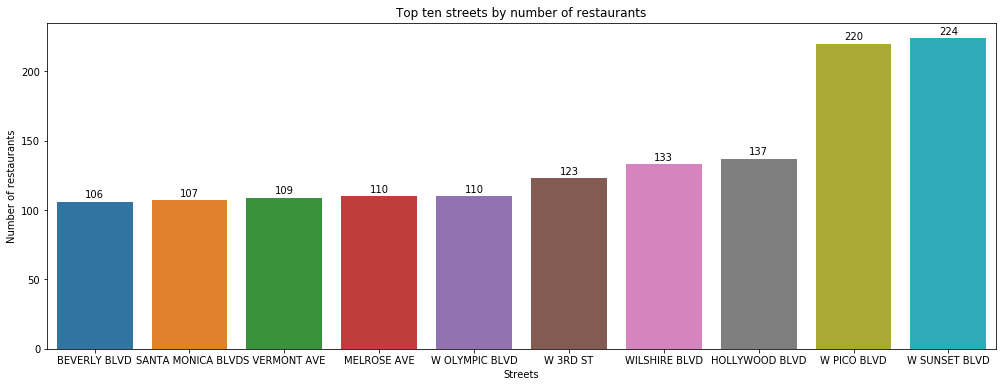

In [22]:
#making a groupby so I can find top streets by number of restaurants included query
top_streets_restaurant = rest_data.groupby(['street_name', 'location_type']).agg({'id': 'count'}).reset_index()
top_streets_restaurant.columns = ['street_name', 'location_type', 'restaurant_count']
top_streets_restaurant = top_streets_restaurant.query('location_type == "Restaurant"')
top_streets_restaurant = top_streets_restaurant.sort_values('restaurant_count', ascending = False).head(10)

#plotting the graph
plt.figure(figsize= (17, 6))
streets_restaurant_graph = sns.barplot(x='street_name', y='restaurant_count', data=top_streets_restaurant, order = top_streets_restaurant.sort_values('restaurant_count').street_name)

#extra graph details
plt.title('Top ten streets by number of restaurants')
plt.xlabel('Streets')
plt.ylabel('Number of restaurants')

#putting numbers on top of each bar, for easy reading
for bar in streets_restaurant_graph.patches:
    streets_restaurant_graph.annotate(format(bar.get_height(), '.0f'),
                       xy = (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                       ha = 'center',
                       va = 'center',
                       xytext = (0, 7),
                       textcoords = 'offset points')
plt.show()

### Where should the cafe be located?

If we are considering that our location type should be a restaurant, then we should perhaps consider these top locations such as Sunset Blvd and Pico Blvd.

In [23]:
location_chain.sort_values('percentage_in_chain', ascending = False)

,location_type,not_in_chain,in_chain,total,percentage_in_chain
0,Bakery,0,283,283,100.0
2,Cafe,169,266,435,61.0
3,Fast Food,461,605,1066,57.0
4,Pizza,166,153,319,48.0
5,Restaurant,4961,2292,7253,32.0
1,Bar,215,77,292,26.0


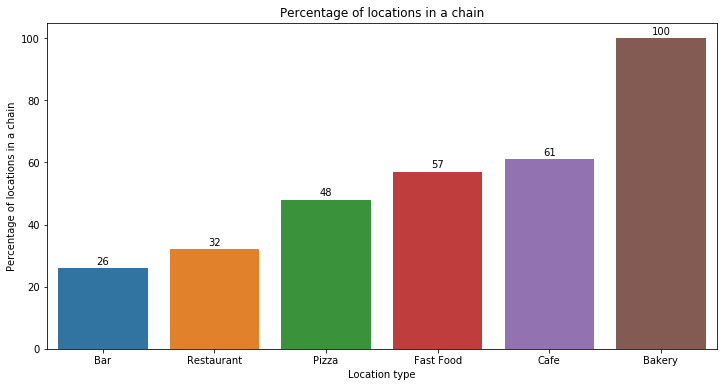

In [24]:
#plotting the graph
plt.figure(figsize= (12, 6))
percent_chain = sns.barplot(x='location_type', y='percentage_in_chain', data=location_chain, order = location_chain.sort_values('percentage_in_chain').location_type)

#extra graph details
plt.title('Percentage of locations in a chain')
plt.xlabel('Location type')
plt.ylabel('Percentage of locations in a chain')

#putting numbers on top of each bar, for easy reading
for bar in percent_chain.patches:
    percent_chain.annotate(format(bar.get_height(), '.0f'),
                       xy = (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                       ha = 'center',
                       va = 'center',
                       xytext = (0, 7),
                       textcoords = 'offset points')
plt.show()

### Should we be in a chain?

Again, if we are considering that our location type should be a restaurant, then we should consider NOT being in a chain. According to the table, only 32% of restaurants are in a chain. We should only consider to be in a chain if we want to be in the Fast Food location type, cafe, or bakery. 

## Overall conclusion

We should consider the restaurant location type and have around 48 seats for the restaurant. Considering that only 32% of restaurants are in a chain, we should consider NOT being in a chain.

# Step 3

Preparing the presentation

Presentation: https://drive.google.com/file/d/1VBkSTTYWDNYgiwHUqlr9mSZiWrpTiV_W/view?usp=sharing